## Numerical Integration

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Numerical evaluation of integrals is a particularly crucial topic because integrals occur widely in physics calculations and, while some integrals can be done analytically in closed form, most cannot. They can almost always be done on a computer. Recall that the definition of an integral is

$$ \int\limits_a^b f(x)\ dx = \lim_{n\to\infty} \sum_{i=1}^n f(x_i^*)\Delta x $$

However, if the integral is not an elementary one, we can integrate it numerically. Numerical integration goes back to the definition of the integral using its summation definition, for a finite bound. 

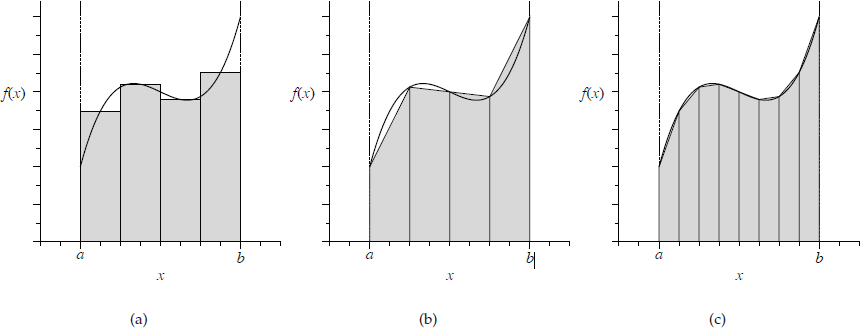

Figure (a) goes by the classical definition of Riemann sum by divding the area into rectanglar slices of equal widths. (b) Trapezoidal rule approximates the area as set of trapezoids and is usually more accurate. (c) Depicts that increasing the number of slices makes the shaded area more accurate and close to the true area under the curve.


### Trapezoidal Rule

Suppose we have a function $f(x)$ and we want to calculate its integral with respect to $x$ from $x=a$ and $x=b$, which we denote as $I(a,b)$:

$$ I(a,b) = \int\limits_a^b f(x) dx $$

Suppose we divide the interval from $a$ to $b$ into $N$ slices or steps so that each slice has a width of

$$ h = \frac{b-a}{N} $$

Then, the area of the trapezoid for this **slice** is

$$ A_k = \frac{1}{2}h\left[f(a+(k-1)h)+f(a+kh)\right] $$

It can be inferred that the approximation for the area under the whole curve is the sum of the areas of the trapezoids for all $N$ slices, i.e.

$$ \boxed{I(a,b) = h \left[\frac{1}{2}f(a)+\frac{1}{2}f(b)+\sum_{k=1}^{N-1}f(a+kh)\right]} $$

which is the extended trapezoidal rule. This will be our guiding formula as we code later on. We can give it a tr to see how $I(a,b)$ works in code. Suppose we want to calculate the integral of $x^4-2x+1$ from $x=0$ to $x=2$ using the trapezoidal rule with $N=10$ slices.

In [17]:
N = 10  #number of slices
a = 0   #lower bound
b = 2   #upper bound
h = (b-a)/N

def f(x):
    return x**4 - 2*x + 1

def trapezoid(a, b):
    sum = 0.5*f(a) + 0.5*f(b)
    for k in range(1, N):
        sum += f(a+k*h)
    integral = h*sum
    return integral

print("The area under the curve f(x) from x = {} to x = {} is {} units".format(a, b, trapezoid(0,2)))

The area under the curve f(x) from x = 0 to x = 2 is 4.50656 units


**Alternative Code:** We can vectorize our parameters to avoid ```for``` loops!

In [15]:
# Note that N is the number of slices, 
# a and b are the bounds, and 
# h=(b-a)/N is the slice width

def f(x):
    return x**4 - 2*x + 1

def trapezoid(N, a, b):
    h = (b-a)/N
    points = np.linspace(a, b, N+1)
    function_value = f(points)
    integral = h*(0.5*function_value[0] + 0.5*function_value[-1] + np.sum(function_value[1:-1]))
    return integral

print("The area under the curve f(x) from x = {} to x = {} is {} units".format(a, b, trapezoid(10, 0, 2)))

The area under the curve f(x) from x = 0 to x = 2 is 4.50656 units


### Simpson's Rule

Since trapezoidal rule is adequate for cases where no great accuracy is required, greater accuracy in data and values still holds its importance in physics. As we know that increasing the number of $N$ steps increases accuracy, very large number of steps can gradually render or calculation bit slower. Simpson's Rule offer a more advanced scheme for calculating integrals that can achieve high accuracy while still arriving at the answer quickly.

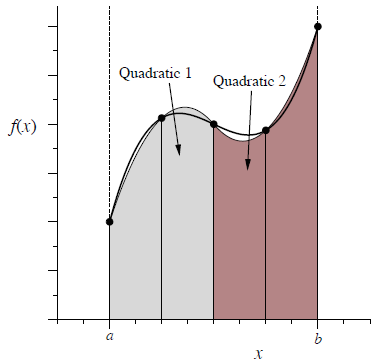

The simplest idea of this scheme is to approximate a curve as a quadratic function. What we do is take three points which would be the basis of our parabola, and take the area under that parabola. The endpoints are taken and the middle of the curve is where the vertex of the parabola occurs. We approximate the curve as a quadratic equation that looks like

$$ f(x) \approx f^*(x) = c_nx^2 + d_nx + e_n $$

where $c_n, d_n$, and $e_n$ are constants which satisfy

$$
    \left\{
        \begin{array}{ll}
            c_n = 2f(b) - 4f\left(\dfrac{b-a}{2}\right) + 2f(a)\\
            d_n = -f(b) + 4\left(\dfrac{b-a}{2}\right) - 3f(a)\\
            e_n = f(0)
        \end{array}
    \right.
    $$
    
If, as before, we are integrating from $x=a$ to $x=b$ in slices of width $h$ then the three points bounding the first pair of slices fall $x=a$, $a+h$, and $a+2h$, those bounding the second pair at $a+2h$, $a+3h$, $a+4h$, and so forth. Then, the approximate value of the entire integral is given by 

$$ \boxed{I(a,b) \approx \frac{1}{3}\left[f(a)+f(b) + 4\sum_{k\;\text{odd}} f(a+kh) + 2\sum_{k\;\text{even}}f(a+kh)\right]} $$

Note that $N$ takes only the value of **even** slices. Using the same $f(x)$ and parameters we used in Trapezoidal rule, we approximate the value of $f(x)$ using Simpson's rule as shown below.

In [20]:
N = 10  #number of slices
a = 0   #lower bound
b = 2   #upper bound
h = (b-a)/N

def f(x):
    return x**4 - 2*x + 1

def simpsons(a, b):
    sum = f(a) + f(b)
    k_odd, k_even = 0, 0
    for k in range(1, N):
        if k%2 == 0:
            k_even += f(a+k*h)
        else:
            k_odd += f(a+k*h)
    integral = (1/3)*h*(sum + 4*k_odd + 2*k_even)
    return integral

print("The area under the curve f(x) from x = {} to x = {} is {:.5f} units".format(a, b, simpsons(0,2)))

The area under the curve f(x) from x = 0 to x = 2 is 4.40043 units


which is in agreement on its actual value of 4.4. However, these line of codes are a bit messy and takes lots of lines. We can then vectorize the parameters just like we did in the trapezoidal rule.

In [22]:
# Note that N is the number of slices, 
# a and b are the bounds, and 
# h=(b-a)/N is the slice width

def f(x):
    return x**4 - 2*x + 1

def simpsons(N, a, b):
    h = (b-a)/N
    points = np.linspace(a, b, N+1)
    function_value = f(points)
    integral = (1/3)*h*(function_value[0] + function_value[-1] + 4*np.sum(function_value[1:-1:2]) + 2*np.sum(function_value[2:-1:2]))
    return integral

print("The area under the curve f(x) from x = {} to x = {} is {:.5f} units".format(a, b, simpsons(10, 0, 2)))

The area under the curve f(x) from x = 0 to x = 2 is 4.40043 units
